<a href="https://colab.research.google.com/github/fajni/ELFAK-TiMAP/blob/main/Hijerarhijska%20klasterizacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasterizacija (Algoritam za hijerarhijsku klasterizaciju)



Hijerarhijsko klasterovanje (_eng. Hierarchical Clustering_)

Hierarchical clustering

In [30]:
import pandas as pd
from matplotlib import pyplot as plot
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage



---



## Podaci

Prikaz podataka:

In [31]:
# Učitavanje skupa podataka (koristi se skraćeni skup podataka)
try:
  !wget https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Mall_Customers/Mall_Customers.csv -O Mall_Customers.csv
except:
  print("An exception occurred")

data = pd.read_csv("Mall_Customers.csv").head(61)

data

--2025-06-30 14:58:01--  https://raw.githubusercontent.com/fajni/ELFAK-TiMAP/refs/heads/main/Data/Mall_Customers/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3772 (3.7K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.68K  --.-KB/s    in 0s      

2025-06-30 14:58:01 (42.2 MB/s) - ‘Mall_Customers.csv’ saved [3772/3772]



,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
56,57,Female,51,44,50
57,58,Male,69,44,46
58,59,Female,27,46,51
59,60,Male,53,46,46




---



### Brisanje tekstualnih vrednosti

Izbacivanje tekstualnih vrednosti:

In [32]:
# Izbacivanje atributa tako da su svi preostali atributi realni brojevi.
data.drop(columns="Gender", inplace=True)

print(data.head())
print(data.describe())

   CustomerID  Age  Annual Income (k$)  Spending Score
0           1   19                  15              39
1           2   21                  15              81
2           3   20                  16               6
3           4   23                  16              77
4           5   31                  17              40
       CustomerID        Age  Annual Income (k$)  Spending Score
count   61.000000  61.000000           61.000000       61.000000
mean    31.000000  37.754098           30.360656       49.754098
std     17.752934  14.715814            9.904600       27.430917
min      1.000000  18.000000           15.000000        3.000000
25%     16.000000  24.000000           20.000000       31.000000
50%     31.000000  35.000000           30.000000       50.000000
75%     46.000000  49.000000           39.000000       73.000000
max     61.000000  70.000000           46.000000       99.000000




---



## Kreiranje i treniranje modela

Kreira se model za hijerarhijsko klasterovanje

In [33]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(data);

clustering

AgglomerativeClustering(n_clusters=3)



---



Skaliranje podataka u opsegu 0 - 1:

In [34]:
# Koristi se MinMax skaliranje tako da se podaci za prikaz preslikavaju u
# opseg 0.0-1.0 za prikaz.
# Funkcija fit_transform prilagođava skaliranje podacima pa onda nad tim
# istim podacima primenjuje skaliranje
# (identično kao da se prvo pozove funkcija fit pa zatim funkcija transform
# sa istim argumentom).
data_plot = preprocessing.MinMaxScaler().fit_transform(data)

# Broj elemenata (broj redova x broj kolona)
print(data.size)
print(data_plot.size)

# Broj redova
print(data.shape[0])
print(data_plot.shape[0])

244
244
61
61




---



### Vizuelni prikaz podataka

In [35]:
print(f"Annual Income column number: {data.columns.get_loc('Annual Income (k$)')}")
print(f"Spending Score column number: {data.columns.get_loc('Spending Score')}")

Annual Income column number: 2
Spending Score column number: 3


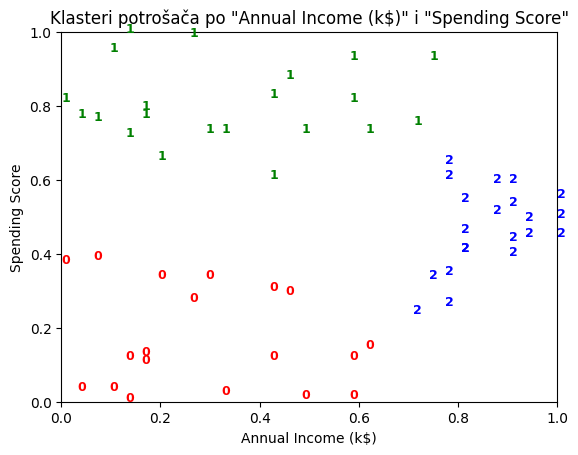

In [36]:
# Iscravaju se podaci prema dodeljenim klasterima u funkciji od 2 atributa.
colors = 'rgb'

for i in range(data.shape[0]):

    plot.text(data_plot[i, 2], data_plot[i, 3], str(clustering.labels_[i]),

              color=colors[clustering.labels_[i]],
              fontdict={'weight': 'bold', 'size': 9}
        )

plot.xlabel('Annual Income (k$)')
plot.ylabel('Spending Score')
plot.title('Klasteri potrošača po \"Annual Income (k$)\" i \"Spending Score\"')
plot.show()



---



### Hijerarhijsko klasterovanje (eng. Agglomerative clustering)

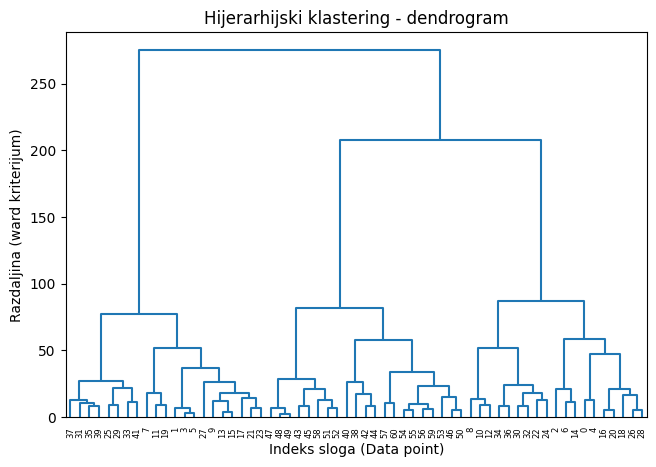

In [37]:
linkage_matrix = linkage(data, 'ward')

figure = plot.figure(figsize=(7.5, 5))
dendrogram(linkage_matrix, color_threshold=0)

plot.title('Hijerarhijski klastering - dendrogram')
plot.xlabel('Indeks sloga (Data point)')
plot.ylabel('Razdaljina (ward kriterijum)')
plot.show()



---



Prikaz poslednjih 24 klastera

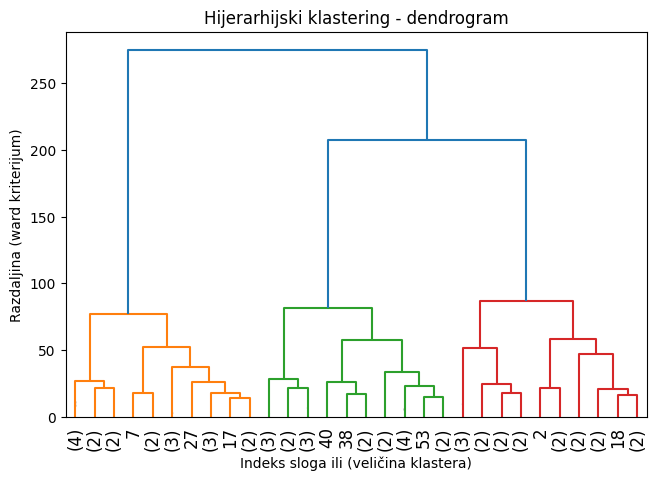

In [38]:
figure = plot.figure(figsize=(7.5, 5))

dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Prikaz samo poslednjih p objedinjenih klastera.
    p=30,  # Prikaz samo poslednjih 24 objedinjenih klastera.
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plot.title('Hijerarhijski klastering - dendrogram')
plot.xlabel('Indeks sloga ili (veličina klastera)')
plot.ylabel('Razdaljina (ward kriterijum)')
plot.show()